In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving The-Office-Lines-V4.csv to The-Office-Lines-V4.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['The-Office-Lines-V4.csv']))

In [ ]:
df = pd.read_csv('The-Office-Lines-V4.csv')

In [ ]:
df

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN
...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,NaN
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,NaN
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,NaN
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,NaN


In [ ]:
df= df.drop('Unnamed: 6', 1)

def gender(name):
    if name == 'Michael' or name == 'Jim' or name == 'Dwight' or name == 'Ryan' or name == 'Stanley' or name == 'Kevin' or name == 'Oscar' or name == 'Toby' or name == 'Creed' or name == 'Andy' or name == 'Roy' or name == 'Darryl' or name == 'Gabe' or name == 'Robert California' or name == 'Robert' or name == 'Clark' or name == 'Pete':
        return 0
    elif name == 'Pam' or name == 'Phyllis' or name == 'Angela' or name == 'Kelly' or name == 'Meredith' or name == 'Jan' or name == 'Erin' or name == 'Nellie':
        return 1
    
df["gender"] = df["speaker"].map(gender)

df = df.dropna()

df['gender'] = df['gender'].astype(int)

df['number_of_words'] = df['line'].str.split().str.len()

df['speaker_id'] = pd.factorize(df.speaker)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df

,season,episode,title,scene,speaker,line,gender,number_of_words,speaker_id
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,0,14,0
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",0,9,1
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,0,14,0
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",0,8,1
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",0,10,0
...,...,...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,0,55,16
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,1,41,14
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,1,31,5
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,0,46,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['line']
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.33)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

print(len(X_val))
print(len(y_val))

15967
15730
15967
15730
15967
15967


In [ ]:
# padding: not all lines are the same length, but they have to be the same length for NN; padding will fix this
# do this for train, test and val sets
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

lines_Xtrain = list(X_train)
lines_Xval = list(X_val)
lines_Xtest = list(X_test)

# there will be a max length of line (maxlen), which should be the length of the longest sentence. maxlen should be same in all sets
longest_line_Xtrain = (max(lines_Xtrain, key=len))
maxlen_Xtrain = len(longest_line_Xtrain.split())

# longest_line_Xval = (max(lines_Xval, key=len))
# maxlen_Xval = len(longest_line_Xval.split())
maxlen_Xval = maxlen_Xtrain


# longest_line_Xtest = (max(lines_Xtest, key=len))
# maxlen_Xtest = len(longest_line_Xtest.split())
maxlen_Xtest = maxlen_Xtrain


# only 1000 most frequent words & oov_token so any unknown word in test set wont just be thrown away, but will be replaced by token we choose
tokenizer = Tokenizer(num_words = 10000, oov_token="<OOV>")
tokenizer.fit_on_texts(lines_Xtrain)
word_index = tokenizer.word_index

sequences_Xtrain = tokenizer.texts_to_sequences(lines_Xtrain)
sequences_Xval = tokenizer.texts_to_sequences(lines_Xval)
sequences_Xtest = tokenizer.texts_to_sequences(lines_Xtest)


# default padding is pre, so zeros will occur before ints
padded_Xtrain = pad_sequences(sequences_Xtrain, maxlen = maxlen_Xtrain)
padded_Xval = pad_sequences(sequences_Xval, maxlen = maxlen_Xval)
padded_Xtest = pad_sequences(sequences_Xtest, maxlen = maxlen_Xtest)

print("\n Padded sequences train: \n", padded_Xtrain)
print("\n Padded sequences val: \n", padded_Xval)
print("\n Padded sequences test: \n", padded_Xtest)

# now each row in the matrix is a line with the same length, and oov_token specifiec out-of-vocabulary tokens that arent recognized
# also, only 10 000 most frequent words are included



 Padded sequences train: 
 [[   0    0    0 ...  628    3   68]
 [   0    0    0 ...    0    0 2886]
 [   0    0    0 ...  292  190  484]
 ...
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0   46]
 [   0    0    0 ...    0  358 5348]]

 Padded sequences val: 
 [[   0    0    0 ...   29   15   68]
 [   0    0    0 ...   27   25  560]
 [   0    0    0 ...   45    7 1353]
 ...
 [   0    0    0 ...  652  702  841]
 [   0    0    0 ...    2   77  242]
 [   0    0    0 ...    9   57   14]]

 Padded sequences test: 
 [[   0    0    0 ...    0 5938    3]
 [   0    0    0 ...    0    0    9]
 [   0    0    0 ...    6  379 3465]
 ...
 [   0    0    0 ...    0    0   37]
 [   0    0    0 ...  135 1094  363]
 [   0    0    0 ...   26  348    9]]


In [ ]:
len(longest_line_Xtrain.split())

232

In [ ]:
# this is an optimal bag of words (multiclass, not binary); it reveals whether a word is present or not (0 or something other)
# and it also reveals the actual frequency of that word; the lower the number, the higher the frequency 


In [ ]:
# data should be float32, not int. goes for output too
# also everything should be a numpy array
Y_train = np.asarray(y_train).astype('float32')
Y_val = np.asarray(y_val).astype('float32')
Y_test = np.asarray(y_test).astype('float32') 
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(15967,)
(15967,)
(15730,)


In [ ]:
# now we have everything in its correct shape (i hope)
# time to start building the model!

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(232)) # putting maxlen 232 here bc otherwise it throws an error when we predict
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 affine (Dense)              (None, 1)                 233       
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# well that works at least! now we add optimizer, sgd, with accuracy metric
sgd = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
print(X_test.shape)
print(padded_Xtrain.shape)

(15730,)
(15967, 232)


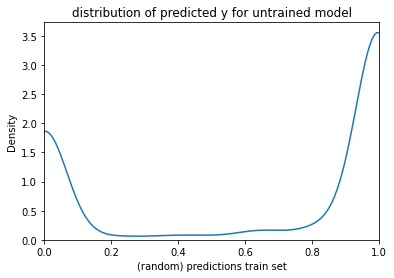

In [ ]:
# we can use the model now, but the weights are still random. no optimzation yet
y_pred = model.predict(padded_Xtrain) 
sns.kdeplot(y_pred.squeeze())
plt.xlabel('(random) predictions train set')
plt.title('distribution of predicted y for untrained model')
plt.xlim((0,1));


In [ ]:
# looks weird to me. model doesnt seem so ignorant after all, because there is some variation
# however, it is working correctly; 0 is male and 1 is female
# model seems to be  predicting more female
# now lets train!

In [ ]:
# training model for 15 epochs just to see what happens 
num_epochs = 20
history = model.fit(padded_Xtrain, Y_train, 
                    epochs = num_epochs, validation_data=(padded_Xval, Y_val), batch_size = 100)

Epoch 1/20
160/160 [==============================] - 1s 6ms/step - loss: 0.3734 - accuracy: 0.6153 - val_loss: 0.3137 - val_accuracy: 0.6831
Epoch 2/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2983 - accuracy: 0.6989 - val_loss: 0.2942 - val_accuracy: 0.7035
Epoch 3/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2845 - accuracy: 0.7133 - val_loss: 0.2849 - val_accuracy: 0.7131
Epoch 4/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2739 - accuracy: 0.7239 - val_loss: 0.2716 - val_accuracy: 0.7267
Epoch 5/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2696 - accuracy: 0.7284 - val_loss: 0.2682 - val_accuracy: 0.7300
Epoch 6/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2619 - accuracy: 0.7360 - val_loss: 0.2602 - val_accuracy: 0.7383
Epoch 7/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2555 - accuracy: 0.7427 - val_loss: 0.2580 - val_accuracy: 0.7405
Epoch 

In [ ]:
# accuracy is at its highest at 0.7572, which is pretty good! dont know why it goes down from there, though
# this might be for the same reason that accuracy was high in the classic machine learning methods;
# because the model predicts male all the time

In [ ]:
# lets visualize the optimization process

In [ ]:
history_dict = history.history
loss_values = history.history['loss']
acc_values = history.history['accuracy']

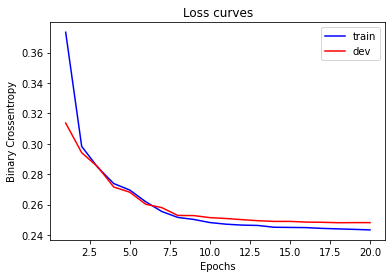

In [ ]:
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

epochs = range(1, len(dev_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, dev_loss, 'r', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

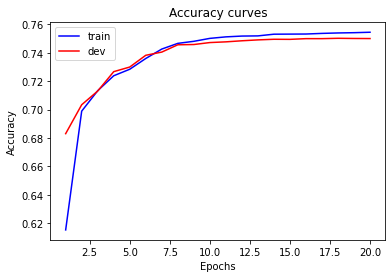

In [ ]:
train_accuracy = history.history['accuracy']
dev_accuracy = history.history['val_accuracy']
plt.clf() 
plt.plot(epochs, train_accuracy, 'b', label='train')
plt.plot(epochs, dev_accuracy, 'r', label='dev')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# now we can look at predicted scores after testing
y_pred = model.predict(padded_Xtest)
print(y_pred.shape)
print(y_pred[:10])

y_pred = y_pred.squeeze() # this flattens the data
print(y_pred.shape)
print(y_pred[:10])


(15730, 1)
[[0.0000000e+00]
 [3.1042725e-01]
 [0.0000000e+00]
 [8.0697937e-03]
 [4.9548700e-14]
 [6.2801967e-17]
 [0.0000000e+00]
 [3.5978427e-15]
 [0.0000000e+00]
 [0.0000000e+00]]
(15730,)
[0.0000000e+00 3.1042725e-01 0.0000000e+00 8.0697937e-03 4.9548700e-14
 6.2801967e-17 0.0000000e+00 3.5978427e-15 0.0000000e+00 0.0000000e+00]


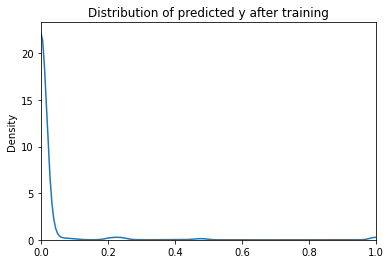

In [ ]:
sns.kdeplot(y_pred)
plt.title('Distribution of predicted y after training')
plt.xlim((0,1));

In [ ]:
# model seems to have learned something; most speakers are male
# seems not to be predicting female a lot

# to find out how well the model did, we need to binarize the output again into zeroes and ones
# to do this, we use a threshold at 0.5 to implement our decision function for the model

y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print(y_pred.shape)
print(y_pred[:10]) # as we see, in these 10 cases, the model predicted male 8 times and female 2 times

# just restarted runtime and ran code and now it predicts male 10 times

(15730,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# now we find out how well we do on the test data
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred)) # correct labels and labels returned by classifier
print(classification_report(y_test, y_pred)) # same thing here

0.7476160203432931
              precision    recall  f1-score   support

           0       0.75      0.99      0.86     11870
           1       0.19      0.01      0.02      3860

    accuracy                           0.75     15730
   macro avg       0.47      0.50      0.44     15730
weighted avg       0.62      0.75      0.65     15730



In [ ]:
# model mostly predicts male
# as the recall shows, barely any (0.06%) of the female lines were correctly identified (this was on the first run)
# model is constantly saying the line is male; overfitting. however, recall is not 0 so it does better than SVM and NB

# after restarting and rerunning, recall is 1 for male and 0 for female

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[11725   145]
 [ 3825    35]]
